<a href="https://colab.research.google.com/github/hsarfraz/Tiny-Machine-Learning/blob/main/0_4_Graphing_Neural_Network_Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Introduction**

In this notebook I will graph the accuracy of the model to show how it gets more accurate as it goes through many epochs (training cycles). The model that I create is a linear regression model that is the same one created in notebook 0.3. The only difference in this notbook is that I have created a graph which illustrates how a model becomes more accurate as you increase the number of epochs to train the model's neural network.

In [1]:
# We first import TensorFlow and other libraries
import sys

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# This script requires TensorFlow 2 and Python 3.
if tf.__version__.split('.')[0] != '2':
    raise Exception((f"The script is developed and tested for tensorflow 2. "
                     f"Current version: {tf.__version__}"))

if sys.version_info.major < 3:
    raise Exception((f"The script is developed and tested for Python 3. "
                     f"Current version: {sys.version_info.major}"))

#### **A quick note on the loss function**

In notbooks 0.1 and 0.2 I used a specific formula of the loss function which was:
$$
Loss = {1 \over n} \sum_{i=0}^{n}{(y_i-\hat y_i)^2}
$$

In the previous notebook (0.3) and in this notebook I am using a different loss function from TensorFlow. This is because there are many different types of loss functions that can be used for each situation. [Here](https://www.tensorflow.org/api_docs/python/tf/keras/losses) is documentation of the different types of TensorFlow loss functions.

#### **Training the Model with 300 Epochs**

In [15]:
# Define your model type
SHAPE = [1] #we need to identify how many X values are being taken in to define the shape. since I am defining one X variable I will set the shape to 1
model = Sequential([Dense(units=1, input_shape=SHAPE)])

# Compile your model with choice of optimizer and loss function
LOSS = 'mean_squared_error'  #you have to decide which loss function from tensorflow you will use
model.compile(optimizer='sgd', #optimizer: stohastic gradient descent (sgd) -this will use the slope of the tangent line (gradient) of the loss function to reach the minimum
              loss=LOSS) #loss function: mean_squared_error -this will calculate the loss value using the assigned loss function

# We then set up some functions and local variables
predictions = []
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, log={}):
    #model.predict() - Uses the calculated weights from `model.fit()` on test data to make the predictions
    predictions.append(model.predict(xs,verbose=0))
callbacks = myCallback()


### SETTING UP TRAINING DATASET ###
# We then define the xs (inputs) and ys (outputs)
# training dataset with 1 negative values and 4 positive values
xs = np.array([-1,  0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3, -1, 1.0, 3.0, 5.0, 7.0], dtype=float)

# training dataset with 4 negative values and 4 positive
#xs = np.array([-4, -3, -2, -1,  0, 1.0, 2.0, 3.0, 4.0], dtype=float)
#ys = np.array([-9,-7,-5,-3, -1, 1.0, 3.0, 5.0, 7.0], dtype=float)

#model.fit() - It calculates the parameters/weights on training data and saves them as an internal objects state.
#use `verbose=0` to hide the epoch outputs
#use `verbose=1` to show the progress of each epoch
#use `verbose=2` to display the epoch output in each line
model.fit(xs, ys, epochs=300, callbacks=[callbacks], verbose=0)

#### **Comparing the Epoch Accuracy**

I am now plotting the resulting prediction at EPOCH_NUMBERS = 1,25,50,150,300. If you'd like to see other Epochs simply update the EPOCH_NUMBERS variable and re-run the cell!

*   **First Graph Analysis** (Relationship between all Epochs)
  *   If you look at the graph below you can see that as the number of epochs increase, the model prediction line gets closer to the line of the actual results (the training dataset line).
*   **Second Graph Analysis** (Relationship between 300 Epoch line and Training Dataset Line (Actual Results line)
  *   If you look at the second graph you can see that the relationship between the model prediction line at the 300th Epoch and the Training Dataset line is pretty close. But there is a gap between the two lines around -1. This means that the model could not predict the exact outputs for any negative x values. The reason why the ML model does not predict the exact output values is because there are not many negative x values and outputs included in the training dataset. Currently there are 4 positive x-values (1,2,3,4) and one negative x-value (-1) which causes the ML model to not predict the the actual y output.

  **In conclusion,** it is important for a training dataset to include **equal amounts of data which represent all types of categories** (in this situation it is the amount of negative and positive x and y values). When a training dataset equally includes different data types/categories then the ML model will be able to predict accurate results for each category during validation (I have included a definition of this term below).


  #### **Definitions of the stages/types of datasets used during ML model training**


 Types of ML Datasets  | Definition
 ------------- | -------------
 Training Dataset  | The dataset that is initially used to fit/train the ML model
 Validation Dataset  | The dataset used during the training phase of the model and used to fine-tune the model's parameters  
 Test Dataset  | The dataset used after the ML model has been fully trained to assess the model's perfomance on completly new/unseen data

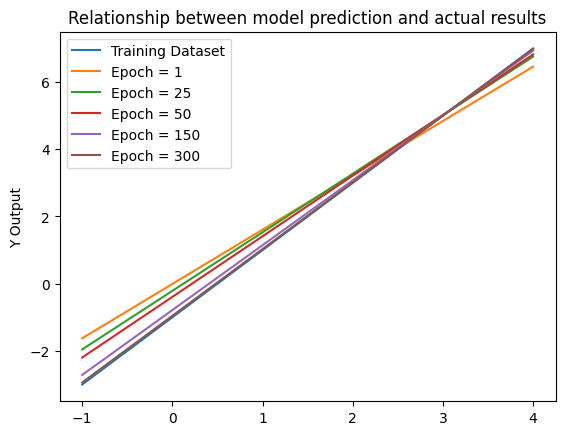

In [19]:
EPOCH_NUMBERS=[1,25,50,150,300] # Update me to see other Epochs
plt.plot(xs,ys,label = "Training Dataset")
for EPOCH in EPOCH_NUMBERS:
    plt.plot(xs,predictions[EPOCH-1],label = "Epoch = " + str(EPOCH))

plt.title('Relationship between model prediction and actual results')
plt.ylabel('X Input')
plt.ylabel('Y Output')
plt.legend()
plt.show()

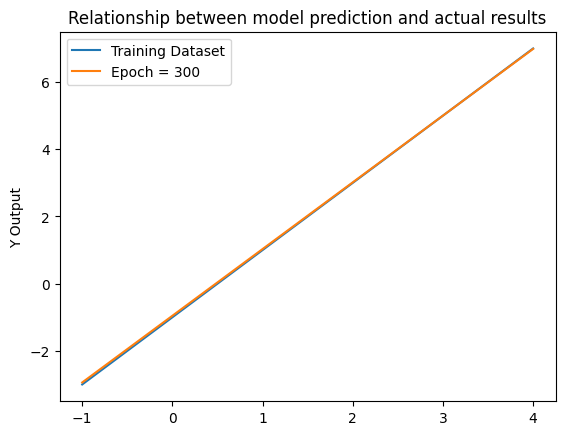

In [20]:
EPOCH_NUMBERS=[300] # Update me to see other Epochs
plt.plot(xs,ys,label = "Training Dataset")
for EPOCH in EPOCH_NUMBERS:
    plt.plot(xs,predictions[EPOCH-1],label = "Epoch = " + str(EPOCH))

plt.title('Relationship between model prediction and actual results')
plt.ylabel('X Input')
plt.ylabel('Y Output')
plt.legend()
plt.show()